In [58]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
path = "/gdrive/MyDrive/deeplearning/world-data-2023.csv"

In [6]:
# Load dataset
data = pd.read_csv(path)



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [8]:
data.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [9]:
data.shape

(195, 35)

In [11]:
columns_to_remove = ['Country', 'Density\n(P/Km2)', 'Abbreviation','Birth Rate', 'Calling Code',
       'Capital/Major City', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price','Largest city', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand','Total tax rate', 'Latitude',
       'Longitude' ]
data_c = data.drop(columns=columns_to_remove) #cleaned data
data_c

,Agricultural Land( %),Land Area(Km2),Armed Forces size,Co2-Emissions,CPI,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Population,Population: Labor force participation (%),Tax revenue (%),Unemployment rate,Urban_population
0,58.10%,"652,230","323,000","8,672",149.9,"$19,101,353,833",104.00%,9.70%,47.9,64.5,638.0,$0.43,"38,041,754",48.90%,9.30%,11.12%,"9,797,273"
1,43.10%,"28,748","9,000","4,536",119.05,"$15,278,077,447",107.00%,55.00%,7.8,78.5,15.0,$1.12,"2,854,191",55.70%,18.60%,12.33%,"1,747,593"
2,17.40%,"2,381,741","317,000","150,006",151.36,"$169,988,236,398",109.90%,51.40%,20.1,76.7,112.0,$0.95,"43,053,054",41.20%,37.20%,11.70%,"31,510,100"
3,40.00%,468,NaN,469,NaN,"$3,154,057,987",106.40%,NaN,2.7,NaN,NaN,$6.63,"77,142",NaN,NaN,NaN,"67,873"
4,47.50%,"1,246,700","117,000","34,693",261.73,"$94,635,415,870",113.50%,9.30%,51.6,60.8,241.0,$0.71,"31,825,295",77.50%,9.20%,6.89%,"21,061,025"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,24.50%,"912,050","343,000","164,175","2,740.27","$482,359,318,768",97.20%,79.30%,21.4,72.1,125.0,$0.01,"28,515,829",59.70%,NaN,8.80%,"25,162,368"
191,39.30%,"331,210","522,000","192,668",163.52,"$261,921,244,843",110.60%,28.50%,16.5,75.3,43.0,$0.73,"96,462,106",77.40%,19.10%,2.01%,"35,332,140"
192,44.60%,"527,968","40,000","10,609",157.58,"$26,914,402,224",93.60%,10.20%,42.9,66.1,164.0,NaN,"29,161,922",38.00%,NaN,12.91%,"10,869,523"
193,32.10%,"752,618","16,000","5,141",212.31,"$23,064,722,446",98.70%,4.10%,40.4,63.5,213.0,$0.24,"17,861,030",74.60%,16.20%,11.43%,"7,871,713"


In [12]:
data_c.shape

(195, 17)

In [13]:
data_c.columns

Index(['Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size',
       'Co2-Emissions', 'CPI', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Unemployment rate', 'Urban_population'],
      dtype='object')

In [14]:
chars_to_remove=[',','$', '%']
cols_to_clean=['Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size',
       'Co2-Emissions', 'CPI', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Unemployment rate', 'Urban_population']

for cols in cols_to_clean:
  data_c[cols] = data_c[cols].astype(str)
  for item in chars_to_remove:
    data_c[cols]=data_c[cols].str.replace(item,'')

<ipython-input-14-729aae01fb16>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_c[cols]=data_c[cols].str.replace(item,'')


In [15]:
data_c=data_c.apply(pd.to_numeric, errors='coerce')


In [16]:
data_c.head()

,Agricultural Land( %),Land Area(Km2),Armed Forces size,Co2-Emissions,CPI,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Population,Population: Labor force participation (%),Tax revenue (%),Unemployment rate,Urban_population
0,58.1,652230.0,323000.0,8672.0,149.90,1.910135e+10,104.0,9.7,47.9,64.5,638.0,0.43,38041754.0,48.9,9.3,11.12,9797273.0
1,43.1,28748.0,9000.0,4536.0,119.05,1.527808e+10,107.0,55.0,7.8,78.5,15.0,1.12,2854191.0,55.7,18.6,12.33,1747593.0
2,17.4,2381741.0,317000.0,150006.0,151.36,1.699882e+11,109.9,51.4,20.1,76.7,112.0,0.95,43053054.0,41.2,37.2,11.70,31510100.0
3,40.0,468.0,NaN,469.0,NaN,3.154058e+09,106.4,NaN,2.7,NaN,NaN,6.63,77142.0,NaN,NaN,NaN,67873.0
4,47.5,1246700.0,117000.0,34693.0,261.73,9.463542e+10,113.5,9.3,51.6,60.8,241.0,0.71,31825295.0,77.5,9.2,6.89,21061025.0


In [17]:
Q1 = data_c.quantile(0.25)
Q3 = data_c.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each column
outliers = ((data_c < lower_bound) | (data_c > upper_bound)).any(axis=1)

# Print the indices of rows containing outliers
print("Indices of rows with outliers:")
print(data_c[outliers].index)


Indices of rows with outliers:
Int64Index([  0,   2,   3,   4,   6,   8,  11,  13,  16,  18,  23,  27,  28,
             31,  32,  33,  34,  36,  37,  45,  47,  51,  53,  54,  57,  60,
             61,  62,  64,  65,  69,  70,  72,  77,  78,  79,  80,  81,  82,
             83,  85,  86,  87,  95,  96,  97, 100, 101, 102, 103, 105, 107,
            108, 110, 113, 114, 118, 119, 121, 122, 123, 125, 126, 127, 131,
            137, 138, 139, 142, 143, 144, 146, 147, 151, 152, 155, 160, 161,
            162, 163, 164, 166, 167, 168, 169, 170, 172, 173, 175, 179, 183,
            184, 185, 186, 190, 191, 194],
           dtype='int64')


In [18]:
data_without_outliers = data_c.drop(data_c[outliers].index)


In [19]:
data_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 193
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Agricultural Land( %)                      93 non-null     float64
 1   Land Area(Km2)                             97 non-null     float64
 2   Armed Forces size                          79 non-null     float64
 3   Co2-Emissions                              92 non-null     float64
 4   CPI                                        87 non-null     float64
 5   GDP                                        96 non-null     float64
 6   Gross primary education enrollment (%)     92 non-null     float64
 7   Gross tertiary education enrollment (%)    89 non-null     float64
 8   Infant mortality                           92 non-null     float64
 9   Life expectancy                            92 non-null     float64
 10  Maternal mortality ratio   

In [20]:
# Handle missing values
data_without_outliers.isnull().sum()


Agricultural Land( %)                         5
Land Area(Km2)                                1
Armed Forces size                            19
Co2-Emissions                                 6
CPI                                          11
GDP                                           2
Gross primary education enrollment (%)        6
Gross tertiary education enrollment (%)       9
Infant mortality                              6
Life expectancy                               6
Maternal mortality ratio                     11
Minimum wage                                 26
Population                                    1
Population: Labor force participation (%)    16
Tax revenue (%)                              15
Unemployment rate                            16
Urban_population                              5
dtype: int64

In [21]:
columns_m =[ 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size',
       'Co2-Emissions', 'CPI', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Unemployment rate', 'Urban_population']
imputer = SimpleImputer(strategy="mean")
# Impute missing values for selected columns
data_imputed = data_without_outliers.copy()
data_imputed[columns_m] = imputer.fit_transform(data_imputed[columns_m])

In [22]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 193
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Agricultural Land( %)                      98 non-null     float64
 1   Land Area(Km2)                             98 non-null     float64
 2   Armed Forces size                          98 non-null     float64
 3   Co2-Emissions                              98 non-null     float64
 4   CPI                                        98 non-null     float64
 5   GDP                                        98 non-null     float64
 6   Gross primary education enrollment (%)     98 non-null     float64
 7   Gross tertiary education enrollment (%)    98 non-null     float64
 8   Infant mortality                           98 non-null     float64
 9   Life expectancy                            98 non-null     float64
 10  Maternal mortality ratio   

In [23]:
# Split data into features and target
features = data_imputed.drop(columns=["GDP"])
target = data_imputed["GDP"]



In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)



In [25]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(73, 16)

(25, 16)

(73,)

(25,)

In [26]:
ss=StandardScaler()

In [27]:
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.fit_transform(X_test)




In [28]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler for the target variable
target_scaler = MinMaxScaler()

# Fit and transform the target variable for training data
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))

# Transform the target variable for testing data using the same scaler
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

In [29]:
X_train.shape
X_test.shape

(73, 16)

(25, 16)

In [30]:
model = tf.keras.Sequential()

In [31]:
model.add(tf.keras.layers.Input(shape=(16,)))

In [32]:
model.add(tf.keras.layers.Dense(50, activation = 'relu'))

In [33]:
model.add(tf.keras.layers.Dense(100, activation = 'relu'))

In [34]:
model.add(tf.keras.layers.Dense(32, activation= 'relu'))

In [35]:
model.add(tf.keras.layers.Dense(1, activation = 'linear'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                850       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 32)                3232      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,215
Trainable params: 9,215
Non-trainable params: 0
_________________________________________________________________


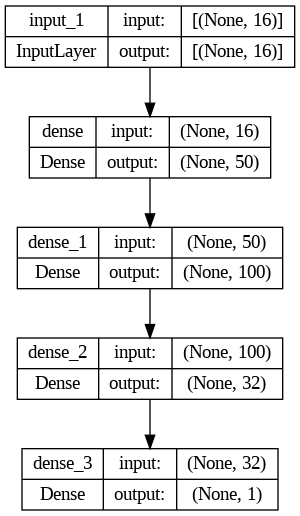

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [38]:
model.compile(
                 loss = 'mean_squared_error',
                 optimizer = 'adam',

                 metrics = ['mean_squared_error'])

In [39]:
model.fit(X_train_scaled, y_train_scaled, epochs=250, validation_data=(X_test_scaled, y_test_scaled))

Epoch 1/250
3/3 [==============================] - 2s 232ms/step - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.0718 - val_mean_squared_error: 0.0718
Epoch 2/250
3/3 [==============================] - 0s 18ms/step - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.0584 - val_mean_squared_error: 0.0584
Epoch 3/250
3/3 [==============================] - 0s 17ms/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 4/250
3/3 [==============================] - 0s 18ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0698 - val_mean_squared_error: 0.0698
Epoch 5/250
3/3 [==============================] - 0s 18ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0592 - val_mean_squared_error: 0.0592
Epoch 6/250
3/3 [==============================] - 0s 19ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 7/250
3/3 [======================

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test_scaled, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

1/1 [==============================] - 0s 36ms/step
Mean Absolute Error: 0.13765816245468618
Mean Squared Error: 0.051412180857168234
R2 Score: 0.2611287268243545
